# Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### This challenge is more hands-on and less guided than the previous ones.

The folder src/train contains a collection of face pictures. This is just a sample of the original dataset that contains more pictures.

The file src/labels.csv contains the labels for those images: emotion labels.

The goal of the challenge is to perform a classification of emotions on this train dataset.
===============================================================================
Before doing that, since images are quite big (meaning they have a lot of features),\
you will have to perform PCA in order to reduce the dimension of your dataset.

Perform a PCA and train a classification model, try to reach the best accuracy on a randomly created test set.

Let's Make sure where we are and where is the data

# Loading Data

In [19]:
! pwd

/home/michaelfaivre/code/MichaeFaivr/student-challenges/curriculum/05-Unsupervised-Machine-Learning/01-Dimensionality-Reduction/01-Challenges/04-Emotions/src


In [20]:
! ls images

Aaron_Eckhart_0001.jpg		       Alicia_Molik_0001.jpg
Aaron_Guiel_0001.jpg		       Alicia_Silverstone_0001.jpg
Aaron_Patterson_0001.jpg	       Alicia_Silverstone_0002.jpg
Aaron_Peirsol_0001.jpg		       Alicia_Witt_0001.jpg
Aaron_Peirsol_0002.jpg		       Ali_Fallahian_0001.jpg
Aaron_Peirsol_0003.jpg		       Ali_Hammoud_0001.jpg
Aaron_Peirsol_0004.jpg		       Ali_Khamenei_0001.jpg
Aaron_Pena_0001.jpg		       Ali_Khamenei_0002.jpg
Aaron_Sorkin_0001.jpg		       Ali_Khamenei_0003.jpg
Aaron_Sorkin_0002.jpg		       Ali_Mohammed_Maher_0001.jpg
Aaron_Tippin_0001.jpg		       Alimzhan_Tokhtakhounov_0001.jpg
Abba_Eban_0001.jpg		       Alimzhan_Tokhtakhounov_0002.jpg
Abbas_Kiarostami_0001.jpg	       Ali_Naimi_0001.jpg
Abdel_Aziz_Al-Hakim_0001.jpg	       Ali_Naimi_0002.jpg
Abdel_Madi_Shabneh_0001.jpg	       Ali_Naimi_0003.jpg
Abdel_Nasser_Assidi_0001.jpg	       Ali_Naimi_0004.jpg
Abdel_Nasser_Assidi_0002.jpg	       Ali_Naimi_0005.jpg
Abdoulaye_Wade_0001.jpg		       Ali_Naimi_0006.jpg
Abdoulaye_Wade_0

In [21]:
labels_df = pd.read_csv("labels.csv")
labels_df.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [22]:
print("IMAGES : ",len(glob.glob("images/*")))
print("LABELS : ", labels_df.shape)

# Alternate method to glob
import os
len(os.listdir("images"))

IMAGES :  668
LABELS :  (13690, 3)


668

In [23]:
## code déjà présent...
# construction des Features et target avec rejet des images qui ont min de shape != 350
# 

X,y, errors,lens = [],[],[],[]
for img_path in glob.glob("images/*.jpg") :
    search = labels_df.copy()
    #print(img_path.split('/')[-1])
    # print( search [ search["image"] == img_path.split('/')[-1]
    #               ]
    #       )
    found=( search[
                  search["image"].str.contains(img_path.split('/')[-1])
                 ]
            )
    if len(found ) > 0 :
        img = plt.imread(img_path)
        if min(img.shape) != 350 :
            errors.append(img_path)
            print(f"⚠️ Warning img with shape {img.shape} found and discarded ⚠️ ")
        else :
            X.append(img)
            y.append(found["emotion"].iloc[0])
            lens.append(len(plt.imread(img_path)))
    else :
        errors.append(img_path)

print("Total errors : ",len(errors))
print(np.array(X).shape) #350**2 = 122500


⚠️ Warning img with shape (297, 249, 3) found and discarded ⚠️ 
⚠️ Warning img with shape (191, 170, 3) found and discarded ⚠️ 
Total errors :  2
(666, 350, 350)


# Quick Exploration

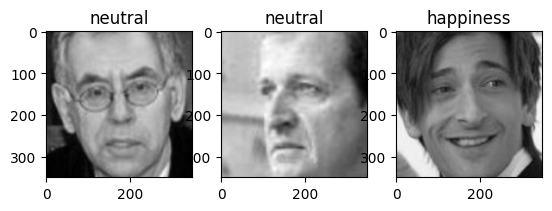

In [24]:
import random

fig,ax = plt.subplots(1,3)

for i in range(3):
    j   = random.randint(0,len(X))
    ax[i].imshow(X[j],cmap="gray")
    ax[i].set_title(f"{y[j]}")

In [25]:
X_reshape = np.array(X).reshape((-1,350*350))
X_center = X_reshape - X_reshape.mean(axis=0)

# Dimensional Reduction

In [26]:
# Fit a PCA and project
from sklearn.decomposition import PCA

nb_pca_features = 800 #400 #300

pca = PCA(nb_pca_features)
pca.fit(X_center)
X_proj = pca.transform(X_center)
# 21sec avec n_components == 300


ValueError: n_components=800 must be between 0 and min(n_samples, n_features)=666 with svd_solver='full'

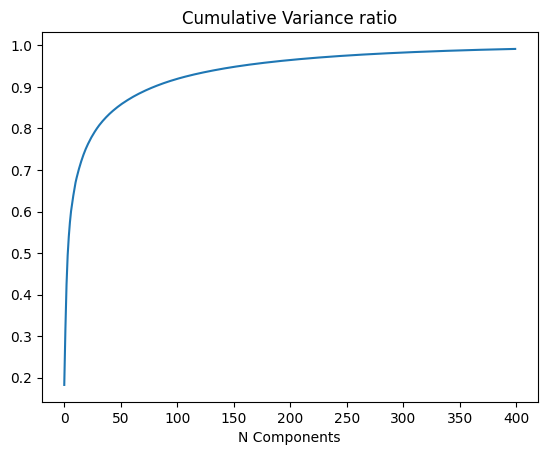

In [13]:
# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance ratio")
plt.xlabel("N Components");

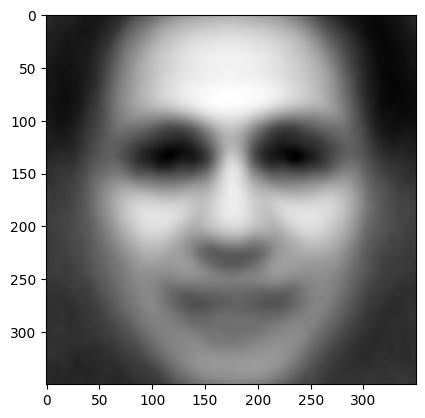

In [38]:
# Let's plot the mean and some Principal Components
plt.imshow(X_reshape.mean(axis=0).reshape(350,350),cmap="gray");

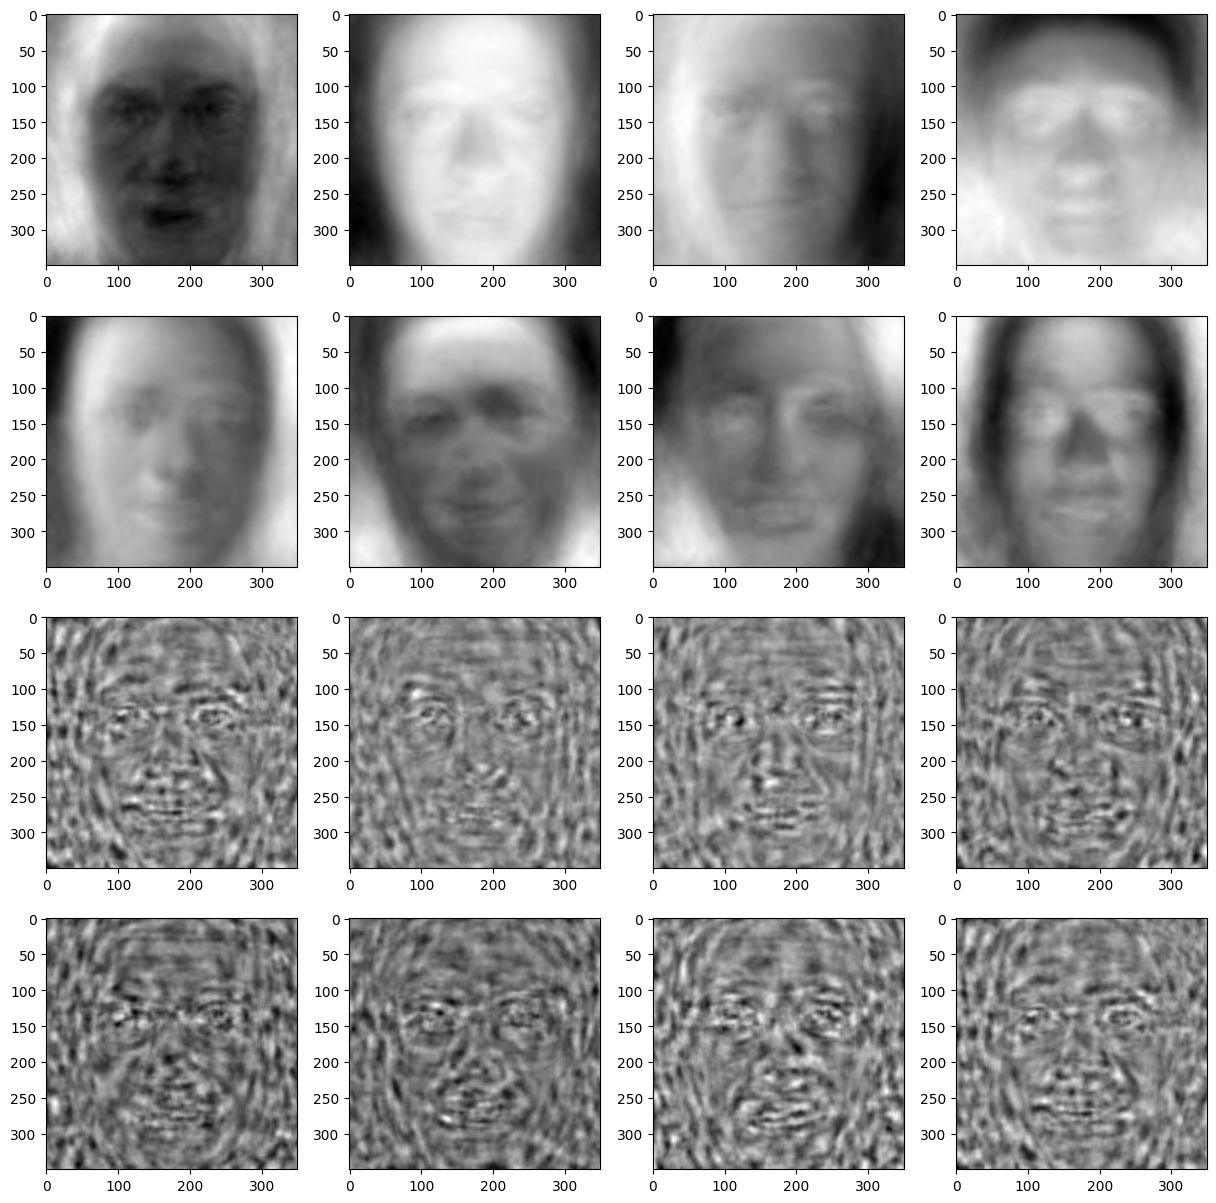

In [39]:
## exemple de plot des 16 premieres nouvelles features

fig, ax = plt.subplots(4,4,figsize=(15,15))

for i in range(4):
    ax[0,i].imshow(pca.components_[i].reshape(350,350) ,cmap="gray")
    ax[1,i].imshow(pca.components_[i+4].reshape(350,350) ,cmap="gray")
    ax[2,i].imshow(pca.components_[-(i+4)].reshape(350,350) ,cmap="gray")
    ax[3,i].imshow(pca.components_[-(i+1)].reshape(350,350) ,cmap="gray")


😳 It's a little scary 😱

# Classification

In [15]:
# Now to train our model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_proj,y,random_state=42)


svc = SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.6646706586826348

### Perform a PCA and train a classification model, try to reach the best accuracy on a randomly created test set.